In [154]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from ast import literal_eval
import matplotlib.colors as mcolors


In [155]:
horror = pd.read_csv('/Users/valentine/Desktop/EPFL/Master/Ma1/ADA/Project/Data/Clean/Horror_Movies_Clean.csv')

In [156]:
country_to_region = {
    "United States of America": "North America",
    "Canada": "North America",
    "Mexico": "North America",
    "Argentina": "South America",
    "Brazil": "South America",
    "Chile": "South America",
    "France": "Europe",
    "Germany": "Europe",
    "United Kingdom": "Europe",
    "Italy": "Europe",
    "Spain": "Europe",
    "Japan": "Asia",
    "South Korea": "Asia",
    "China": "Asia",
    "India": "Asia",
    "Australia": "Oceania",
    "New Zealand": "Oceania",
    "Egypt": "Africa",
    "Nigeria": "Africa",
    "South Africa": "Africa",
    "Russia": "Russia",
    "Turkey": "Middle East",
    "Iran": "Middle East",
    "Israel": "Middle East",
    "Saudi Arabia": "Middle East",
}

### Define keywords for common horror themes

In [157]:
keywords = {
    "religion": ["exorcism", "church", "priest", "god", "devil", "holy", "satan", "demon", "angel", "faith", "soul", "worship", "sacrifice", "vatican", "cross", "sin"],
    
    "zombies": ["zombie", "undead", "brain", "walking dead", "infected", "outbreak", "plague", "virus", "apocalypse", "living dead", "survival", "mutation", "quarantine"],
    
    "ghosts": ["ghost", "spirit", "haunted", "poltergeist", "apparition", "haunting", "specter", "paranormal", "supernatural", "medium", "seance", "grave", "curse", "ectoplasm"],
    
    "monsters": ["monster", "creature", "beast", "mutant", "alien", "abomination", "giant", "claws", "fangs", "terror", "mutation", "slaughter", "predator"],
    
    "psychological": ["insanity", "madness", "paranoia", "delusion", "obsession", "hallucination", "disturbed", "psychopath", "crazy", "mind", "fear", "anxiety", "trauma"],
    
    "slasher": ["killer", "serial", "slasher", "butcher", "stalker", "knife", "axe", "blood", "gore", "murder", "death", "victim", "cut", "stabbing", "horror"],
    
    "vampires": ["vampire", "blood", "fang", "immortal", "undead", "night", "bite", "coffin", "darkness", "creature of the night", "dracula", "fanged", "nocturnal"],
    
    "werewolves": ["werewolf", "wolf", "lycan", "transformation", "full moon", "shapeshift", "beast", "claws", "howl", "pack", "curse"],
    
    "witchcraft": ["witch", "spell", "curse", "cauldron", "potion", "hex", "ritual", "dark magic", "sorcery", "conjure", "sacrifice", "occult", "wizard", "hag", "summon"],
    
    "aliens": ["alien", "extraterrestrial", "UFO", "spaceship", "abduction", "invasion", "sci-fi", "ET", "otherworldly", "space", "crop circle", "mars", "galaxy"],
    
    "haunting": ["haunted", "spirit", "ghost", "paranormal", "supernatural", "demonic", "curse", "home", "nightmare", "visions", "entity", "phantom", "soul"],
    
    "cults": ["cult", "ritual", "sacrifice", "devotion", "leader", "blood", "worship", "brainwash", "temple", "sacred", "conspiracy", "indoctrination"],
    
    "psychopaths": ["psychopath", "killer", "murderer", "sociopath", "evil", "crazy", "slaughter", "blood", "torture", "obsession", "unstable", "violent"],
    
    "dark fantasy": ["fantasy", "dark", "creature", "mythical", "fairy tale", "magic", "realm", "curse", "dream", "witch", "elf", "dragon", "enchanted", "underworld"],
    
    "revenge": ["revenge", "revengeful", "payback", "retaliation", "avenger", "punishment", "justice", "blood", "wrath", "vendetta"],
    
    "survival": ["survival", "escape", "apocalypse", "end of the world", "isolated", "stranded", "endurance", "struggle", "last man standing", "desolation", "famine"],
    
    "dark web": ["dark web", "hacker", "cyber", "online", "illegal", "web", "darknet", "black market", "anonymous", "underground", "video", "hidden", "mystery"],
    
    "creepy": ["creepy", "eerie", "chilling", "strange", "unnerving", "disturbing", "haunting", "unsettling", "mysterious", "shiver", "spooky"],
    
    "technology": ["artificial intelligence", "robot", "machine", "android", "AI", "cybernetic", "technology", "sentient", "neural network", "AI overlord", "autonomous", "hacker", "self-aware", "digital", "virtual", "programming", "surveillance", "smart", "computer", "automation", "cyberpunk", "future"],
    
    "dolls": ["doll", "puppet", "mannequin", "toy", "possessed", "creepy doll", "haunted doll", "plaything", "child's toy", "living doll", "mysterious doll", "vintage doll", "dollhouse", "automaton", "ballet doll"]
}

### Search for the themes in the summaries

In [158]:
# Initialize a list to store the results
movie_data = []

# Open and read the summaries
with open("/Users/valentine/Desktop/EPFL/Master/Ma1/ADA/Project/Data/Clean/Summaries.txt", "r") as file:
    for line in file:
        # Split the line into an ID and a summary
        parts = line.strip().split(" ", 1)
        
        if len(parts) < 2:  # Skip lines that do not have a valid summary
            continue
        
        movie_id = parts[0]
        summary = parts[1].lower()  # Convert summary to lowercase for case-insensitive search
        
        # Check if any keyword matches in the summary
        for theme, theme_keywords in keywords.items():
            if any(keyword in summary for keyword in theme_keywords):
                # If a match is found, add the movie ID and theme to the result
                movie_data.append({"ID": movie_id, "Theme": theme})

# Convert the results into a pandas DataFrame
df = pd.DataFrame(movie_data)
df['ID'] = df['ID'].apply(lambda x: ''.join(filter(str.isdigit, x)))

# Display the DataFrame
print(df)

          ID       Theme
0          1    survival
1          1    dark web
2          2     zombies
3          2     slasher
4          2  technology
...      ...         ...
83739  34922     slasher
83740  34922       cults
83741  34926      ghosts
83742  34926     slasher
83743  34926    haunting

[83744 rows x 2 columns]


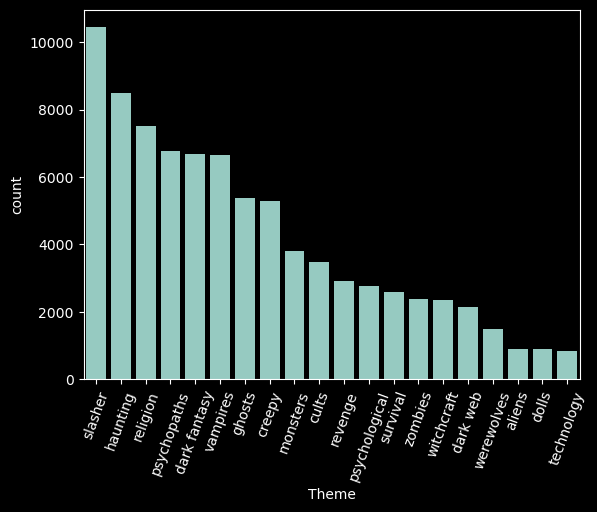

In [159]:
df['Theme'].value_counts()
themes = sns.barplot(df['Theme'].value_counts())
themes.tick_params(axis='x', rotation=70)


In [160]:
df1 = horror[['ID', 'Countries_clean']].copy().dropna()

df1['Countries_clean'] = df1['Countries_clean'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)
df1 = df1.explode('Countries_clean')
df1 = df1.rename(columns={'Countries_clean': 'Country'})

df1['Region'] = df1['Country'].map(country_to_region)

df1.head()


,ID,Country,Region
30,31,United States of America,North America
32,33,United States of America,North America
38,39,United States of America,North America
48,49,Italy,Europe
51,52,United States of America,North America


In [161]:
df1['ID'] = df1['ID'].astype(str)
df['ID'] = df['ID'].astype(str)  

merged_df = pd.merge(df, df1, on='ID')

print(merged_df)

          ID         Theme                   Country         Region
0         82        ghosts  United States of America  North America
1         82      haunting  United States of America  North America
2         82   psychopaths  United States of America  North America
3         82  dark fantasy  United States of America  North America
4         82         dolls  United States of America  North America
...      ...           ...                       ...            ...
10697  34735        creepy                     Spain         Europe
10698  34735        creepy                     Italy         Europe
10699  34735        creepy                    Serbia            NaN
10700  34745       slasher                       NaN            NaN
10701  34745   psychopaths                       NaN            NaN

[10702 rows x 4 columns]


### Plots

In [162]:
custom_palette = ["#ff7100", "#fd9702", "#e102ff", "#ae03ff", "#04a777"]
extended_palette = [
    "#ff7100", "#fd9702", "#e102ff", "#ae03ff", "#04a777",  # Original colors
    "#ff4500", "#fd7b00", "#d700ff", "#8a00ff", "#00b56b",  # Lighter/Darker versions
    "#ff8c00", "#ffbe00", "#bf00ff", "#7a00ff", "#009977",  # Additional variation
    "#ff9e1a", "#ffcf00", "#9c00ff", "#6400e5", "#00cc66",  # More variations
    "#ff6f00"  # Repeat to balance out the 20 colors
]

# Utiliser le style sombre pour la visualisation
plt.style.use('dark_background')

Normalized distribution of themes across the world

/var/folders/3k/8x7fm481513gdjkp_dsyjf3m0000gn/T/ipykernel_79862/504353822.py:19: UserWarning: The palette list has more values (21) than needed (20), which may not be intended.
  fig = sns.barplot(data=theme_region_counts, x='Region', y='Normalized_Count', hue='Theme', palette=extended_palette)


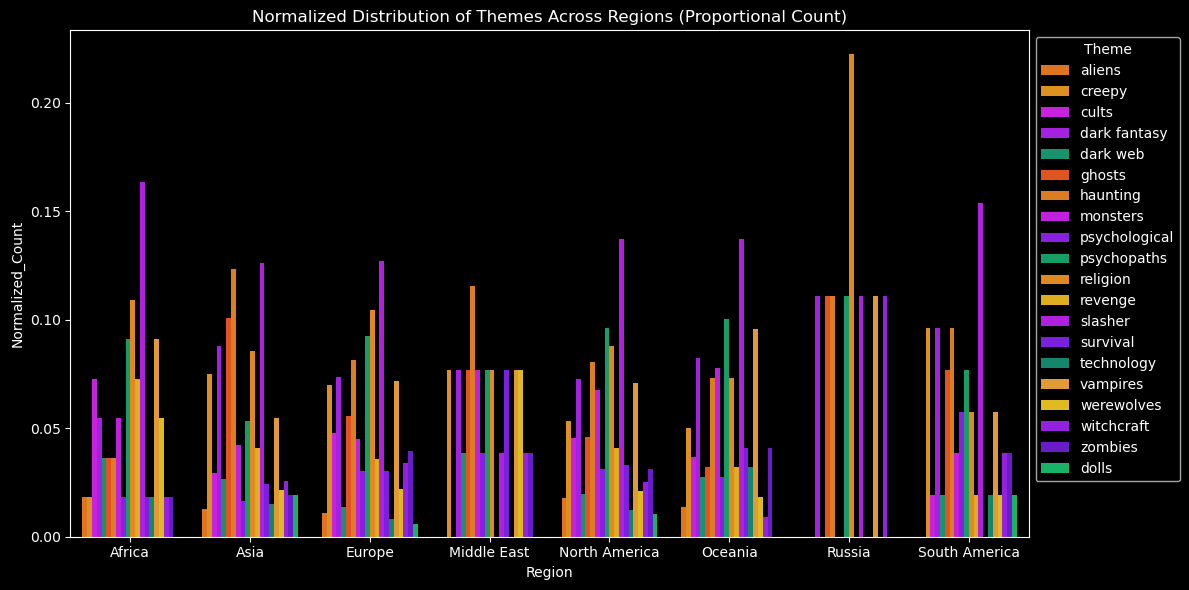

In [163]:
merged_df1 = merged_df.copy()

#Calculate the total number of movies per region
region_counts = merged_df['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Total_Movies']

#Merge this back to the original DataFrame to get the total movies for each row
merged_df1 = merged_df1.merge(region_counts, on='Region', how='left')

#Normalize the count of themes within each region by the total number of movies in that region
theme_region_counts = merged_df1.groupby(['Region', 'Theme']).size().reset_index(name='Count')
theme_region_counts = theme_region_counts.merge(region_counts, on='Region', how='left')
theme_region_counts['Normalized_Count'] = theme_region_counts['Count'] / theme_region_counts['Total_Movies']


#Plotting the normalized data

plt.figure(figsize=(12, 6))
fig = sns.barplot(data=theme_region_counts, x='Region', y='Normalized_Count', hue='Theme', palette=extended_palette)
sns.move_legend(fig, loc='upper left', bbox_to_anchor=(1,1))
plt.title('Normalized Distribution of Themes Across Regions (Proportional Count)')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Normalized theme distribution per country

/var/folders/3k/8x7fm481513gdjkp_dsyjf3m0000gn/T/ipykernel_79862/2959995953.py:21: UserWarning: The palette list has more values (21) than needed (20), which may not be intended.
  sns.barplot(data=filtered_country_theme_counts, x='Normalized_Count', y='Country', hue='Theme', dodge=True, palette= extended_palette)


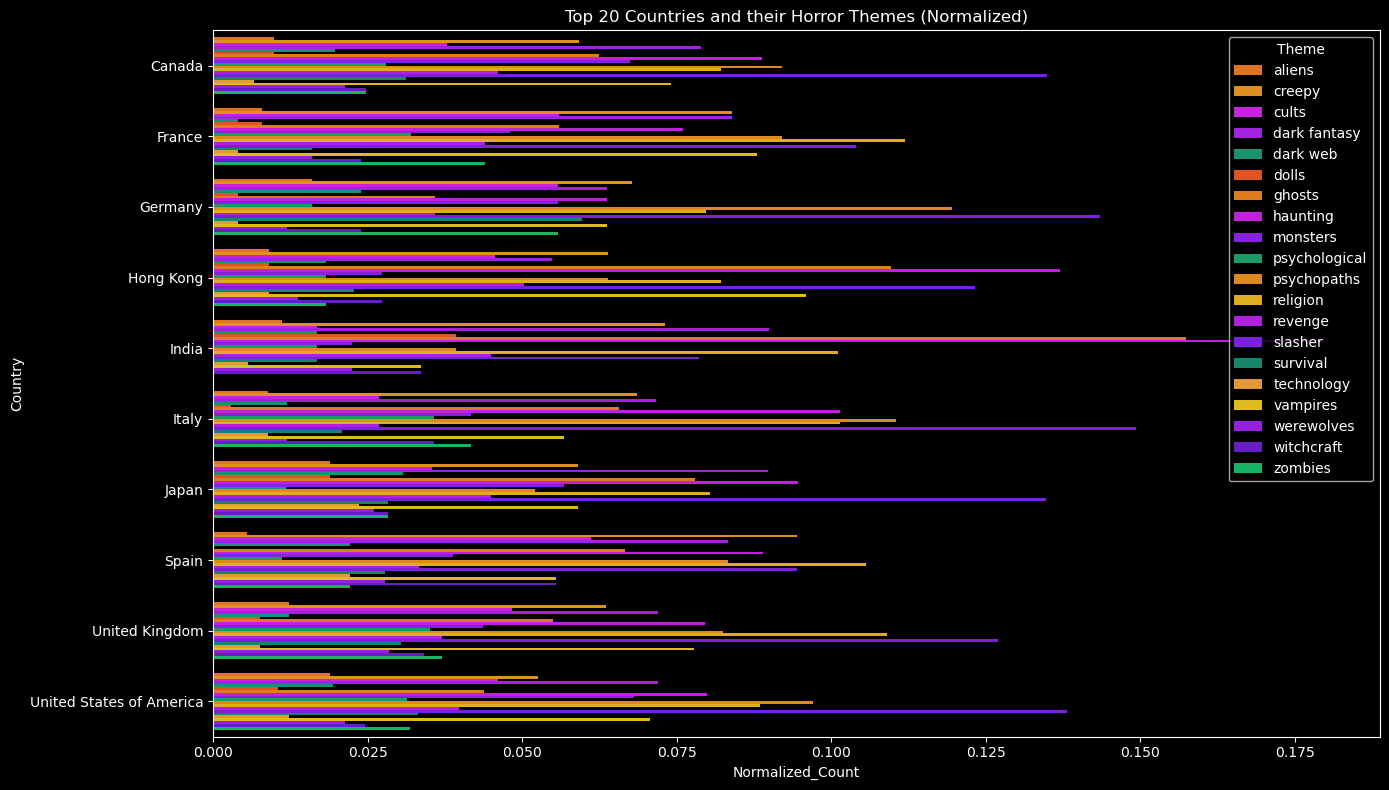

In [164]:
merged_df2 = merged_df.copy()

#Calculate the total number of movies per country
country_counts = merged_df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Total_Movies']
merged_df2 = merged_df2.merge(country_counts, on='Country', how='left')

#Count the themes by country
theme_country_counts = merged_df2.groupby(['Country', 'Theme']).size().reset_index(name='Count')

#Normalize the count of themes within each country by the total number of movies in that country
theme_country_counts = theme_country_counts.merge(country_counts, on='Country', how='left')
theme_country_counts['Normalized_Count'] = theme_country_counts['Count'] / theme_country_counts['Total_Movies']

# Step 5: Filter top 20 countries by total movie count
top_countries = theme_country_counts.groupby('Country')['Count'].sum().nlargest(10).index
filtered_country_theme_counts = theme_country_counts[theme_country_counts['Country'].isin(top_countries)]

# Step 6: Plotting the normalized counts (Proportional Counts)
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered_country_theme_counts, x='Normalized_Count', y='Country', hue='Theme', dodge=True, palette= extended_palette)
plt.title('Top 20 Countries and their Horror Themes (Normalized)')
plt.tight_layout()
plt.show()

Heatmap visualization

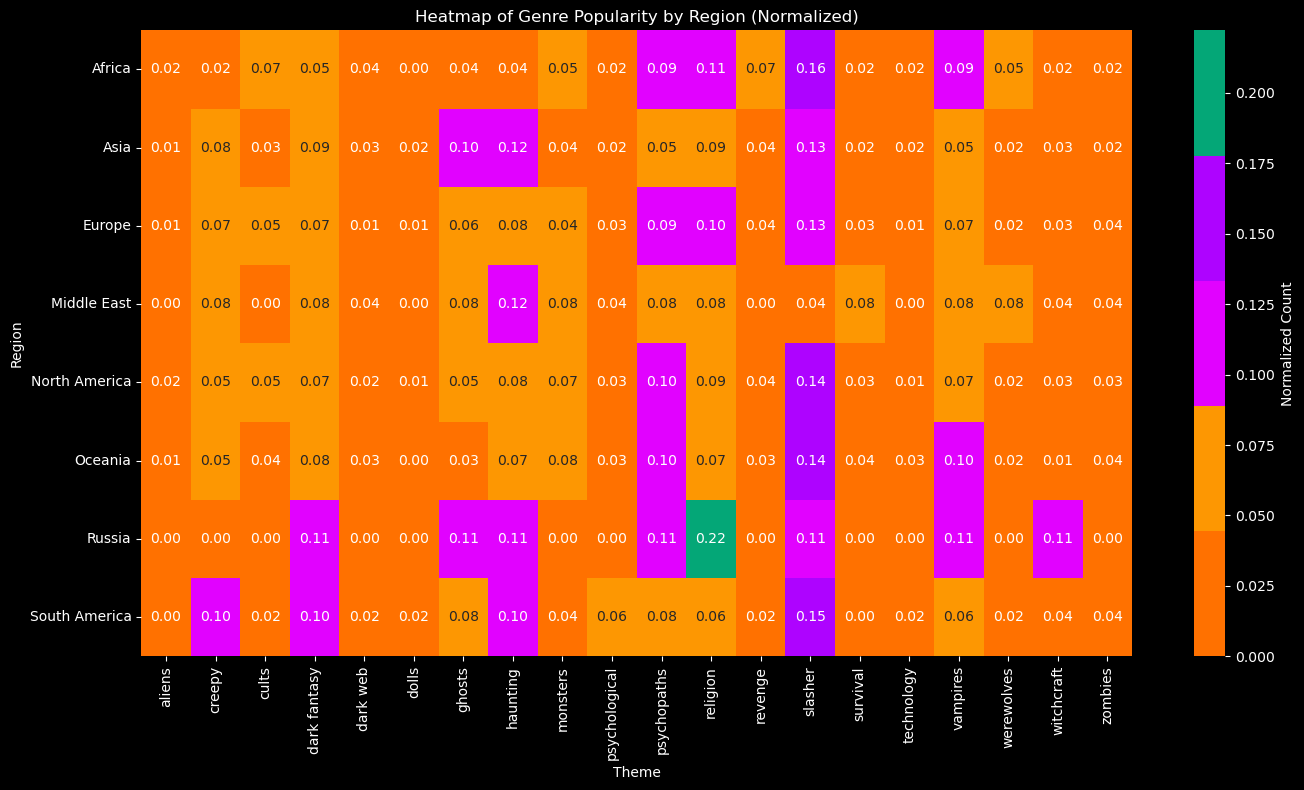

In [165]:
merged_df3 = merged_df.copy()

#Count Themes by Region
theme_region_counts = merged_df3.groupby(['Region', 'Theme']).size().reset_index(name='Count')

#Normalize by Region
theme_region_counts['Normalized_Count'] = theme_region_counts['Count'] / theme_region_counts.groupby('Region')['Count'].transform('sum')

# Step 3: Pivot the data to create a matrix of regions (rows) and genres/themes (columns)
theme_region_pivot = theme_region_counts.pivot(index='Region', columns='Theme', values='Normalized_Count').fillna(0)

cmap = mcolors.ListedColormap(custom_palette)

# Step 4: Plot the Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(theme_region_pivot, annot=True, fmt='.2f', cmap=cmap, cbar_kws={'label': 'Normalized Count'})
plt.title('Heatmap of Genre Popularity by Region (Normalized)')
plt.tight_layout()
plt.show()

Top Themes in Each Region

/var/folders/3k/8x7fm481513gdjkp_dsyjf3m0000gn/T/ipykernel_79862/1891340906.py:9: UserWarning: The palette list has more values (21) than needed (20), which may not be intended.
  sns.barplot(data=top_themes_per_region, x='Normalized_Count', y='Region', hue='Theme', dodge=False, palette=extended_palette)


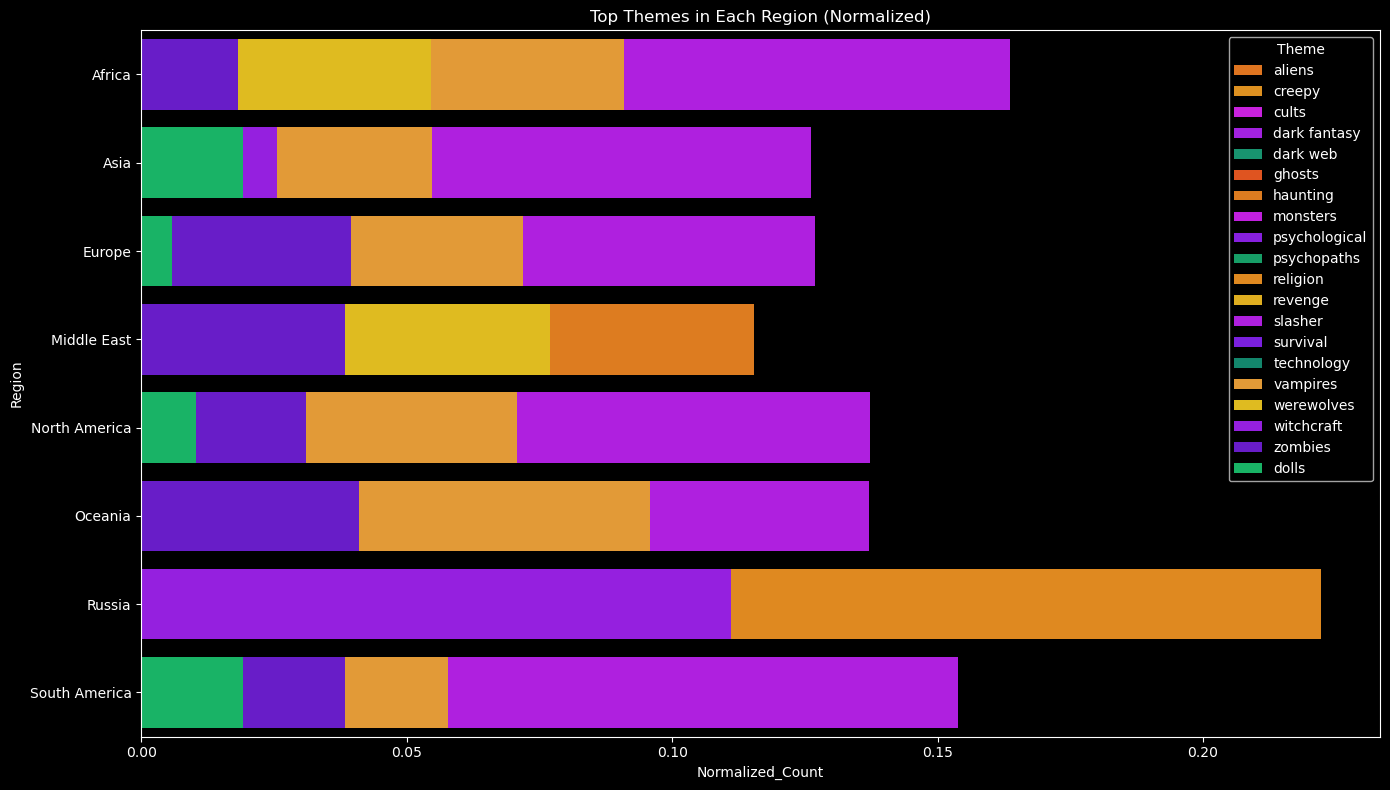

In [166]:
#Group by Region and Theme to calculate the count
top_themes_per_region = theme_region_counts.groupby(['Region', 'Theme']).sum().reset_index()

#Normalize by dividing the count of each theme by the total count of movies in that region
top_themes_per_region['Normalized_Count'] = top_themes_per_region['Count'] / top_themes_per_region.groupby('Region')['Count'].transform('sum')

#Plotting the normalized counts of top themes in each region
plt.figure(figsize=(14, 8))
sns.barplot(data=top_themes_per_region, x='Normalized_Count', y='Region', hue='Theme', dodge=False, palette=extended_palette)
plt.title('Top Themes in Each Region (Normalized)')
plt.tight_layout()

plt.show()

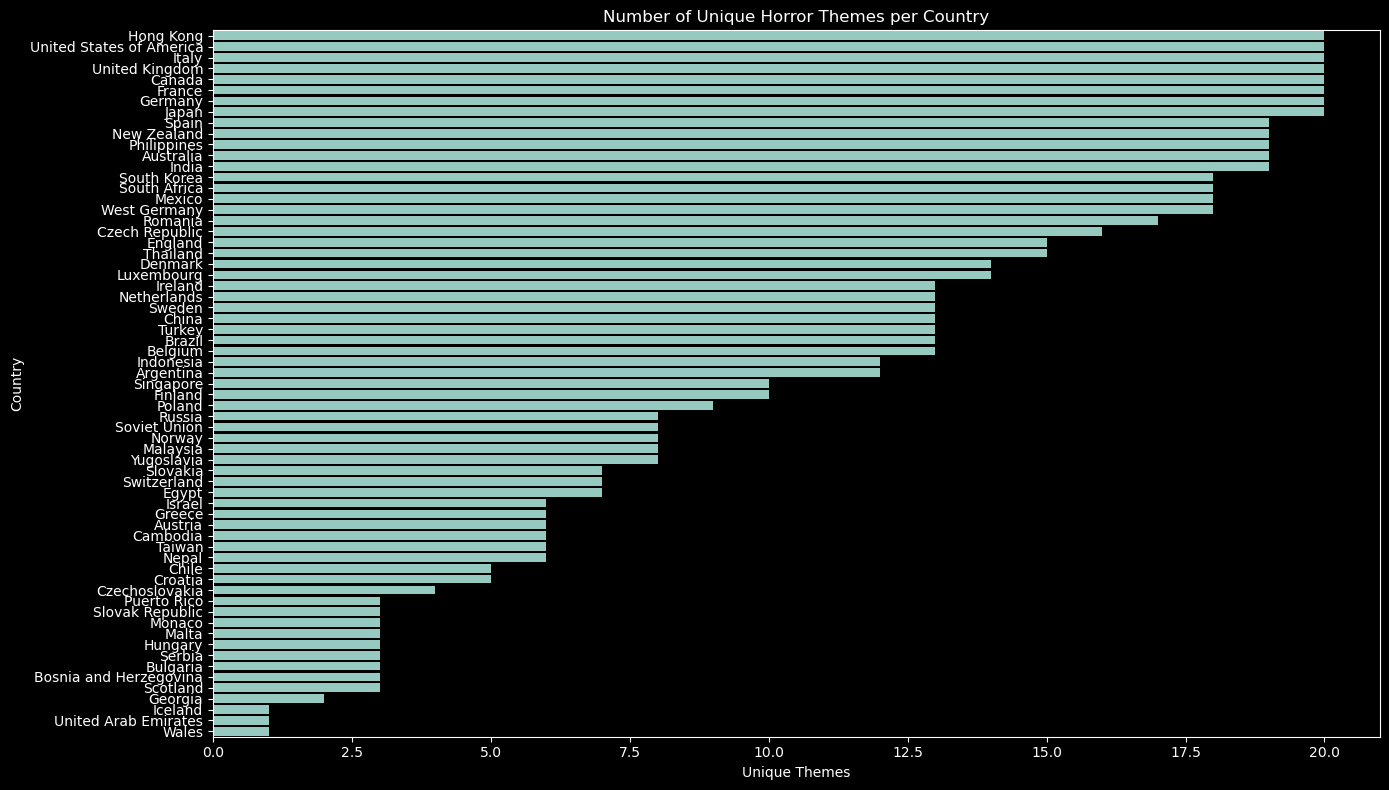

In [167]:
# 5. Number of Themes by Country (Bar plot)
country_theme_counts = merged_df.groupby('Country')['Theme'].nunique().reset_index(name='Unique Themes')

# Sorting countries by the number of unique themes
country_theme_counts = country_theme_counts.sort_values(by='Unique Themes', ascending=False)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=country_theme_counts, x='Unique Themes', y='Country')
plt.title('Number of Unique Horror Themes per Country')
plt.tight_layout()
plt.show()